In [17]:
import numpy as np
import matplotlib.pyplot as plt

from typing import *

<br>

# Gradient descent
---

<br>

### Basic algorithm

The gradient of a function $f$ always point toward the direction with the steepest ascent. The gradient descent consists in following the reverse of the gradient to follow the steepest descent:

&emsp; $f(x+v) \simeq f(x) + v^T \nabla f(x)$
&emsp; $\implies$
&emsp; descent is steepest when $v$ are $\nabla f(x)$ are in opposite direction

The algorithm therefore proceeds in making a small step in the opposite direction of the gradient:

&emsp; $x_{new} \leftarrow x_{old} - \alpha \nabla f$
&emsp; where
&emsp; $\alpha$ is called the learning rate

This process is stopped when the gradient reaches 0 (critical point). We should not this does ensure we reached a global minimum. It might even in fact not bring us to any local minimum either, as we might stay stuck on a saddle point.

<br>

### Line search

What is the size of the step we should perform? Note that in the previous algorithm, there is one key critical fact: **the larger the gradient, the larger the step**. It might seem counterintuitive, as we might expect that in a region of big variations, we should be more careful about our steps. On the contrary, when variations are small, we might want to do big steps, but that might also make us miss a close critical point.

The thing is that there is not good answer here. One approch is to do a **line search**, that is try different step size:

1. We first double the step size every time until it does not decrease anymore: $\alpha_0, \dots \alpha_n$
2. We then binary search for the best step size in the range $\alpha_{n-1}$ to $\alpha_n$

This requires us to be able to evaluate $f(x - \alpha_i \nabla f)$ at each step. When too costly, this approch is best avoided.

<br>

### Stochastic Gradient Descent (SGD)

The most famous algorithm for Artificial Neural Network of the past years. The idea is to avoid computing the exact gradient $\nabla f$, but instead compute an estimate of the gradient $\tilde{\nabla f}$ and use it to perform our gradient descent:

&emsp; $x_{new} \leftarrow x_{old} - \alpha \tilde{\nabla f}$
&emsp; where
&emsp; $\alpha$ is called the learning rate

Normally, the quantity we are trying to diminish is computed using the full training data. For instance, in the case of a regression, we are interested in minimizing the square distance of all points to their predicted outputs. SGD is obtained by **random sub-selection of the training data** to estimate of the gradient, for example by taking a mini-batch of 500 inputs among the 60,000 data points in input.

More sample points means the estimate of the gradient gets better but also more expensive to compute. The random nature of the sub-selection might also help us **avoiding saddle points**: fewer points means more fluctuations and more chances to escape.

<br>

### Gradient clipping

**todo**

<br>

### Example: line search vs fixed learning rate

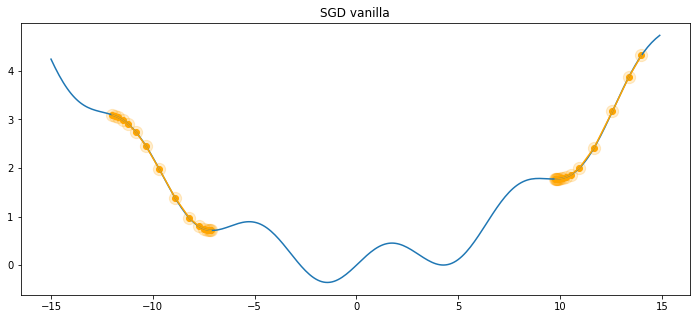

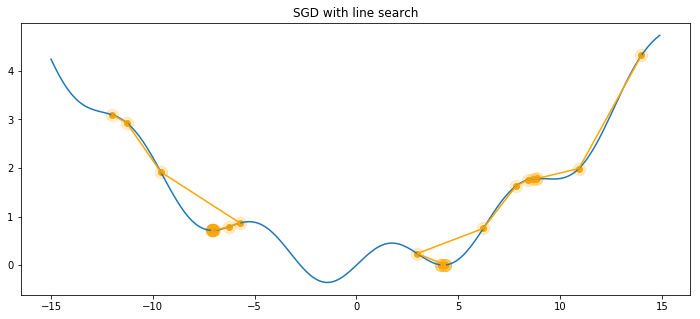

In [74]:
"""
The function to optimize and its derivative
"""

def f_at(xs: np.ndarray):
    return 0.2 * (0.1 * xs ** 2 + 2 * np.sin(xs))

def df_at(xs: np.ndarray):
    return 0.2 * (0.2 * xs + 2 * np.cos(xs))

def df_df_at(xs: np.ndarray):
    return 0.2 * (0.2 - 2 * np.sin(xs))


"""
Gradient descent with fixed rate
"""

def gradient_descent(f, df, x_0: float, lr: float, epoch_nb: int) -> float:
    xs = [x_0]
    for _ in range(epoch_nb):
        x = xs[-1]
        xs.append(x - lr * df(x))
    return np.array(xs)


"""
Gradient descent with line search
"""

def line_search(f, x_0, x_1):
    while f(x_1) < f(x_0):
        dx = x_1 - x_0
        x_1 += dx * 4
        x_0 = x_1
    while f(x_1) > f(x_0):
        x_1 = x_0 + (x_1 - x_0) / 2
    return x_1

def gradient_descent_ls(f, df, x_0: float, lr: float, epoch_nb: int) -> float:
    xs = [x_0]
    for _ in range(epoch_nb):
        x = xs[-1]
        xs.append(line_search(f, x, x - lr * df(x)))
    return np.array(xs)


"""
Plotting the result
"""

def plot_gd(xs, color):
    plt.plot(xs, f_at(xs), color=color)
    plt.scatter(xs, f_at(xs), color=color)
    plt.scatter(xs, f_at(xs), s=150, color=color, alpha=0.2)


xs = np.arange(-15., 15., 0.1)
                  
plt.figure(figsize=(12, 5))
plt.plot(xs, f_at(xs))
plot_gd(gradient_descent(f_at, df_at, -12, 1.0, 15), color='orange')
plot_gd(gradient_descent(f_at, df_at, +14, 1.0, 15), color='orange')
plt.title("SGD vanilla")
plt.show()
                  
plt.figure(figsize=(12, 5))
plt.plot(xs, f_at(xs))
plot_gd(gradient_descent_ls(f_at, df_at, -12, 1.0, 15), color='orange')
plot_gd(gradient_descent_ls(f_at, df_at, +14, 1.0, 15), color='orange')
plt.title("SGD with line search")
plt.show()

<br>

# Newton method
---

<br>

### Basic algorithm

The Newton's algorithm is built to found the zeros of a function. It consists in constructing the tangent of the function at the point $x_i$ and compute the position at which the tangent crosses $y=0$, and take that next point as $x_{i+1}$. It flows from the **order 1 Taylor expansion**:

&emsp; $f(x_{new}) \simeq f(x_{old}) + (x_{new}-x_{old}) f'(x_{old}) = 0$
&emsp; $\implies$
&emsp; $\displaystyle x_{new} = x_{old} - \frac{f(x_{old})}{f'(x_{old})}$

**When applied to an optimization problem**, it is used to find the critical points of a function $f$, that is the point such as $\nabla f = 0$:

&emsp; $\displaystyle x_{new} = x_{old} - \frac{f'(x_{old})}{f''(x_{old})}$

We compare below the trajectory with the gradient descent approaches.

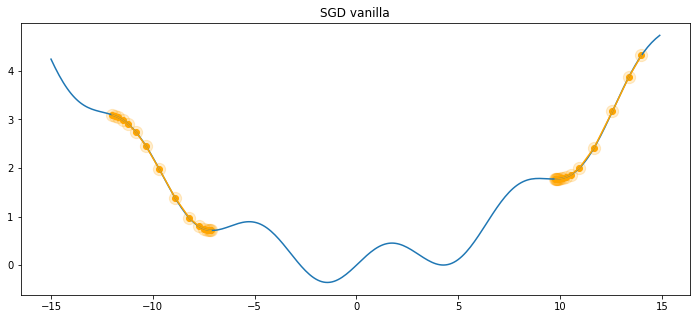

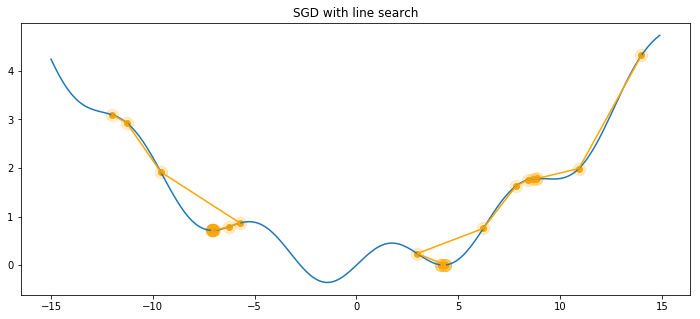

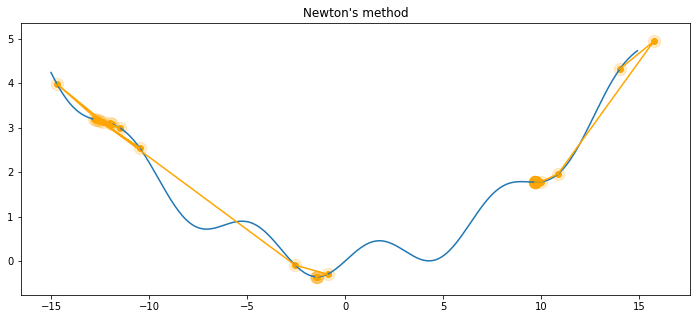

In [76]:
"""
Newton's method
"""

def newton_method(f, df, ddf, x_0: float, lr: float, epoch_nb: int) -> float:
    xs = [x_0]
    for _ in range(epoch_nb):
        x = xs[-1]
        if ddf(x) == 0:
            break
        xs.append(x - lr * df(x) / ddf(x))
    return np.array(xs)


"""
Plotting the result
"""

def plot_gd(xs, color):
    plt.plot(xs, f_at(xs), color=color)
    plt.scatter(xs, f_at(xs), color=color)
    plt.scatter(xs, f_at(xs), s=150, color=color, alpha=0.2)


xs = np.arange(-15., 15., 0.1)
          
plt.figure(figsize=(12, 5))
plt.plot(xs, f_at(xs))
plot_gd(gradient_descent(f_at, df_at, -12, 1.0, 15), color='orange')
plot_gd(gradient_descent(f_at, df_at, +14, 1.0, 15), color='orange')
plt.title("SGD vanilla")
plt.show()
    
plt.figure(figsize=(12, 5))
plt.plot(xs, f_at(xs))
plot_gd(gradient_descent_ls(f_at, df_at, -12, 1.0, 15), color='orange')
plot_gd(gradient_descent_ls(f_at, df_at, +14, 1.0, 15), color='orange')
plt.title("SGD with line search")
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(xs, f_at(xs))
plot_gd(newton_method(f_at, df_at, df_df_at, -12, 1.0, 15), color='orange')
plot_gd(newton_method(f_at, df_at, df_df_at, +14, 1.0, 15), color='orange')
plt.title("Newton's method")
plt.show()

These graph illustrates that the Newton's method leads to some **non-intuitive behavior**, because it tries to **converge to critical points**, which can be local minimum, local maximum, or just a saddle points.

<br>

### Multivariate version (searching zeros)

The multivariate version of the Newton's method is also based on the **order 1 Taylor expansion**:

&emsp; $f(x) \simeq f(a) + (x - a)^T \nabla f (a) = 0$
&emsp; $\implies$
&emsp; $x^T \nabla f(a) = a^T \nabla f(a) - f(a)$

We would like to divide by the gradient, but this is not a valid operation. In fact, **this problem is under-constrained** (1 equation for $N$ unknowns) and so there are many possible solutions. For instance, we could decide to fix all components of $x$ to be equal to $a$ except for one, and solve for this component, leading to the same approach as the univariate approach. This is illustrated below for two components:

&emsp; $\displaystyle df = \frac{\partial f}{\partial x} dx + \frac{\partial f}{\partial y} dy = -f(a)$
&emsp; $\implies$
&emsp; $\displaystyle dx = - \frac{f(a)}{f_x}$
&emsp; or
&emsp; $\displaystyle dy = - \frac{f(a)}{f_y}$

We can also choose these two variables such that they are proportional to a constant $\alpha$ and proportional to their respective partial derivative: $dx = \alpha f_x$, $dy = \alpha f_y$ and $(x-a) = \alpha \nabla f$. This reduces the problem to a single variable and single equation, which we can solve:

&emsp; $df = \alpha f_x^2 + \alpha f_y^2 = -f(a)$
&emsp; $\implies$
&emsp; $\displaystyle \alpha = - \frac{f(a)}{\Vert \nabla f \Vert^2}$
&emsp; $\implies$
&emsp; $\boxed{x_{new} = x_{old} - \frac{f(x_{old})}{\Vert \nabla f(x_{old}) \Vert^2} \nabla f(x_{old})}$

We can check that this formulation is equal to our usual formula when $x$ is a single variable. We can also view this formula as simply **following the steepest line toward the zero value**.

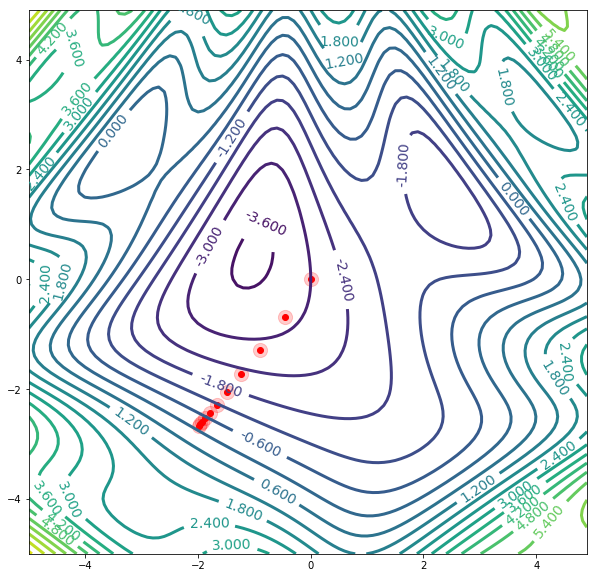

In [113]:
"""
A function and its derivative
"""

def z_at(xs, ys):
    return 0.2 * (xs**2 + ys**2) + np.sin(0.5 * xs * ys + xs) - 3.

def grad_z_at(xs, ys):
    f_x = 0.4 * xs + (0.5 * ys + 1) * np.cos(0.5 * xs * ys + xs) - 3.
    f_y = 0.4 * ys + (0.5 * xs) * np.cos(0.5 * xs * ys + xs) - 3.
    if isinstance(xs, np.ndarray):
        return np.stack((f_x, f_y)).transpose((1, 2, 0))
    else:
        return np.array([f_x, f_y])


"""
Newton's method to find the zeros
"""


def find_zeros_newton(x: float, y: float, epoch_nb: int) -> np.ndarray:
    points = []
    pos = np.array([x, y])
    points.append(pos)
    for _ in range(epoch_nb):
        x, y = pos
        grad = grad_z_at(x, y)
        pos = pos - z_at(x, y) / np.dot(grad, grad) * grad
        points.append(pos)
    return np.stack(points)


"""
Display the results
"""

xs = np.arange(-5., 5., 0.1)
ys = np.arange(-5., 5., 0.1)
X, Y = np.meshgrid(xs, ys)
Z = z_at(X, Y)

points_newton = find_zeros_newton(0, 0, epoch_nb=10)

fig, ax = plt.subplots(figsize=(10, 10))
CS = ax.contour(X, Y, Z, levels=20, linewidths=3, antialiased=True)
ax.scatter(points_newton[:,0], points_newton[:,1], color='red')
ax.scatter(points_newton[:,0], points_newton[:,1], s=200, color='red', alpha=0.2)
ax.clabel(CS, inline=1, fontsize=14)
plt.show()

<br>

### Multivariate version (optimization)

The optimization version of the Newton's method is pretty **computer intensive** due to need to compute the Jacobian of the gradient $J_{\nabla f}$, also known as the Hessian matrix $H$, and sometimes written $\nabla \nabla f$:

&emsp; $\nabla f (x) \simeq  \nabla f(a) + H(a) (x-a) = 0$
&emsp; $\implies$
&emsp; $x = a - H(a)^{-1} \nabla f(a)$

Note that **the inverse of the Hessian might not exist**. It usually works here because the Hessian matrix is symmetric, and so its eigenvalues are real, and in the general case, these eigenvalues will not be equal to zero (allowing the inverse to be computed).

<br>

# Simulated Annealing / Beam Search / Genetic Algorithms
---